In [1]:
import numpy as np
import pandas as pd
from scipy import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bigdata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Récupération de la matrice de couverture

In [2]:
mcouv = pd.read_excel (r'./Matric_Couverture3.xlsx')
mcouv

,Unnamed: 0,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",...,"Au clic sur le titre dun élément, celui-ci saffiche dans une nouvelle page",Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter
0,4.1.1\tCU001-001 Afficher le header,X,X,X,X,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.9\tCU001-007 Afficher du contenu dans une ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.10\tCU001-008 Contribuer du contenu dans u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mcouv.columns[1:]

Index(['sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..',
       'Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire',
       'Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.',
       'Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :',
       'Au clic sur la langue sélectionnée, le système affiche les autres langues',
       'Au clic sur la deuxième ou troisième langue, le système réaffiche  les boutons réseaux sociaux et le bouton + est caché',
       'Si la page est traduite, celle-ci est affichée.',
       '\tle système redirige vers la page parente traduite de niveau N-1',
       '\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page 

### Récupération des exigences metiers

In [4]:
ef = []
for i in mcouv.columns[1:]:
    ef = append(ef, i)

ef

array(['sur le logo depuis une page intérieure, le système redirige vers la page d\x92accueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..',
       'Sur le logo depuis la page d\x92accueil, le système affiche le bloc d\x92information temps réel et le bloc identitaire',
       'Si l\x92utilisateur clique sur le bouton d\x92accessibilité, le système redirige vers une page éditoriale.',
       ..., 'Les ronds ne sont pas cliquables',
       'Au clic sur le visuel du parcours, le système redirige vers le parcours concerné',
       'Libellé Champ de partage twitter    + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter'],
      dtype='<U382')

In [5]:
len(ef)

1056

## Construction de la Matrice Carée

In [6]:
l = ef.transpose()
a1 = len(l)
a2 = len(ef)
A = np.zeros((a1,a2), dtype=int)

mcar = pd.DataFrame(A, index = l, columns = ef)
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,"Au clic sur le titre dun élément, celui-ci saffiche dans une nouvelle page",Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Insertion des impacts entre exigences

In [7]:
for y in mcouv.columns[1:]:
    for x in mcouv.index:
        if mcouv[y][x] == 'O':
            for z in mcouv.columns[1:]:
                if mcouv[z][x] == 'X':
                    mcar.at[z,y] = mcar[y][z] + 1
                    

In [8]:
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,"Au clic sur le titre dun élément, celui-ci saffiche dans une nouvelle page",Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
vect = np.zeros(a2, dtype=int)
vect

array([0, 0, 0, ..., 0, 0, 0])

### Ajout de la Sensibilité

In [10]:
mcar.loc['SENSIBILITE'] = vect

In [11]:
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,"Au clic sur le titre dun élément, celui-ci saffiche dans une nouvelle page",Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calcul de la Sensibilité de chaque exigence

In [12]:
for i in mcar.columns:
    mcar.at['SENSIBILITE',i] = mcar[i].sum()

In [13]:
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,"Au clic sur le titre dun élément, celui-ci saffiche dans une nouvelle page",Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ajout et calcul de l'Influence

In [14]:
mcar['INFLUENCE'] = mcar.sum(axis=1) 
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter,INFLUENCE
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


# Clustering des exigences pour déterminer l'évolution de chacune

### Utilisons le KMeans

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [16]:
ef

array(['sur le logo depuis une page intérieure, le système redirige vers la page d\x92accueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..',
       'Sur le logo depuis la page d\x92accueil, le système affiche le bloc d\x92information temps réel et le bloc identitaire',
       'Si l\x92utilisateur clique sur le bouton d\x92accessibilité, le système redirige vers une page éditoriale.',
       ..., 'Les ronds ne sont pas cliquables',
       'Au clic sur le visuel du parcours, le système redirige vers le parcours concerné',
       'Libellé Champ de partage twitter    + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter'],
      dtype='<U382')

In [17]:
data = pd.DataFrame( columns = ['texte'])
data

,texte


In [18]:
#Création du Data Set
x=0
for i in ef:
    data.at[x,'texte'] = i
    x=x+1

In [19]:
data

,texte
0,"sur le logo depuis une page intérieure, le sys..."
1,"Sur le logo depuis la page daccueil, le systè..."
2,Si lutilisateur clique sur le bouton daccess...
3,Un clic sur un bouton de réseaux sociaux perme...
4,"Au clic sur la langue sélectionnée, le système..."
5,"Au clic sur la deuxième ou troisième langue, l..."
6,"Si la page est traduite, celle-ci est affichée."
7,\tle système redirige vers la page parente tr...
8,\tSi la page parente de niveau N-1 nest pas ...
9,\tSi la page parente de niveau N-2 nest pas ...


In [20]:
# Extraction des caractéristiques en limitant le nombre de feature à 500
from nltk.corpus import stopwords

vec = TfidfVectorizer(max_features=500, lowercase=True, analyzer='word', stop_words=stopwords.words('french'),ngram_range=(1,4))
vec.fit(data['texte'].values)
features = vec.transform(data['texte'].values)
features

<1056x500 sparse matrix of type '<class 'numpy.float64'>'
	with 9726 stored elements in Compressed Sparse Row format>

In [21]:
features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.32309387, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
#Construction d'un clustering de 4 clusters
random_state = 0 

nbc=4
model = MiniBatchKMeans(n_clusters=nbc, random_state=random_state)
model.fit(features)

MiniBatchKMeans(n_clusters=4, random_state=0)

In [23]:
# Affichons les termes communs à chaque cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(nbc):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 être
 peut
 peut être
 doit
 doit être
 peuvent être
 peuvent
 image
 peut être contribué
 être contribué
Cluster 1:
 clic
 bouton
 affiché
 champ
 utilisateur
 si
 clic bouton
 page
 vers
 formulaire
Cluster 2:
 système affiche
 système
 affiche
 entités
 si
 liste
 affiche liste
 système affiche liste
 événement
 éléments
Cluster 3:
 contributeur
 place
 contributeur place
 peut
 contributeur peut
 contributeur place mode
 place mode
 mode
 contributeur place mode liste
 place mode liste


In [24]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0] 

In [25]:
data.texte[ClusterIndicesNumpy(0, model.labels_) ]

26          Lutilisateur peut créer un lien de niveau 1
27          Lutilisateur peut créer un lien de niveau 2
29     2 boutons de pages peuvent être contribués pou...
33     Lutilisateur peut traduire toutes les pages d...
34     Une page de liste dévénements en français peu...
35        Lutilisateur peut traduire une page existante
97                           La vidéo doit être uploadée
98       Limage doit être au format suivant: jpg et png
99     Une seule image de remplacement peut être cont...
102    Un maximum de 4 entités peut être contribué da...
103     Limage doit être au format suivant: jpg et png.
108    Un contributeur peut classer les positions des...
110    Un maximum de 6 onglets peut être contribué da...
111    Un maximum de 6 pages associées par onglet peu...
115    Cette page ne nécessite pas de contribution po...
183                             Lutilisateur peut créer
184           Lutilisateur peut créer dans ces colonnes
185    Certains contenus ne peu

In [26]:
data.texte[ClusterIndicesNumpy(1, model.labels_) ]

0       sur le logo depuis une page intérieure, le sys...
2       Si lutilisateur clique sur le bouton daccess...
3       Un clic sur un bouton de réseaux sociaux perme...
5       Au clic sur la deuxième ou troisième langue, l...
6         Si la page est traduite, celle-ci est affichée.
7       \tle système redirige vers la page parente tr...
8       \tSi la page parente de niveau N-1 nest pas ...
9       \tSi la page parente de niveau N-2 nest pas ...
12      Nom du champ\t\tType de champ\tobligatoire\tCo...
13      Un fil dAriane est présent sur toutes les pag...
14      Le fil dariane est composé dun lien vers la ...
15      Au clic sur le bouton de partage, un menu supp...
16      Au clic sur le bouton Facebook, lévénement es...
17      Au clic sur le bouton Twitter, lévénement est...
18                                        Date / Horaires
19                                        Infos pratiques
20                                               Soutenir
21      le men

In [27]:
data.texte[ClusterIndicesNumpy(2, model.labels_) ]

1       Sur le logo depuis la page daccueil, le systè...
4       Au clic sur la langue sélectionnée, le système...
10      Le système affiche pour chaque langue ci-desso...
66      Le système affiche dans lordre suivant les él...
72      Le système affiche les entités Carrousel triée...
73      Par défaut, le système affiche le contenu de l...
74           Pour chaque entité le système affiche soit :
77      Au clic sur un des titres présents dans le men...
84      Le système affiche les entités parcours défini...
86      Par défaut, le système affiche le 1er onglet o...
89      Si la page associée est un  évènement, le syst...
90      Si la page associée est une page éditoriale, l...
91      Si la page associée est une liste dévénement,...
118     Le système affiche les informations suivantes ...
121     Le système affiche les éléments suivants de la...
124     Sil ny a pas dimage contribuée en back-offi...
125     Le système affiche les éléments suivants de la...
130     Si la 

In [28]:
data.texte[ClusterIndicesNumpy(3, model.labels_) ]

11     Le contributeur se place en mode liste sur le ...
48     Le contributeur peut ajouter toute page dans l...
53     Le contributeur se place en mode liste sur le ...
55     Le contributeur se place en mode liste sur le ...
59     Le contributeur se place en mode liste sur le ...
92     Le contributeur se place en mode liste sur le ...
93        Le contributeur peut saisir 5 entités maximum.
96     Le contributeur se place en mode liste sur le ...
100    Le contributeur se place se place en mode list...
104    Le contributeur se place en mode liste sur le ...
106    Le contributeur se place en mode liste sur le ...
107    Un contributeur peut classer les positions des...
109    Pages associées : pour chaque onglet, le contr...
178    Le contributeur se place dans une page éditori...
179                    Le contributeur peut sélectionner
180    Le contributeur peut sélectionner lordre daf...
182    Le contributeur se place dans une page éditori...
186    Le contributeur se place

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=model.predict(features))

0.032156481571380034

In [30]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

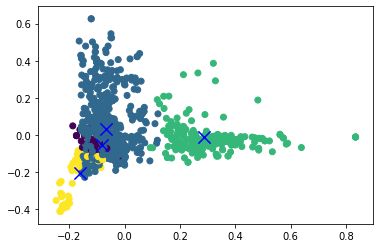

In [31]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

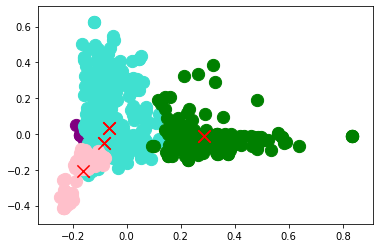

In [32]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(features.toarray())

plt.scatter(acp[:,0], acp[:,1], c=model.predict(features))
acp_cluster_centers = pca.transform(model.cluster_centers_)
for couleur,k in zip(['purple','turquoise','green','pink'],[0,1,2,3]):
    plt.scatter(acp[model.labels_==k,0],acp[model.labels_==k,1],s=150,c=couleur)
    plt.scatter(acp_cluster_centers[:, 0], acp_cluster_centers[:,1], marker='x', s=150, c='red')
plt.show() 

### Ajout de la ligne Evolution

In [33]:
vec = np.zeros(a2+1, dtype=int)
vec

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
mcar.loc['EVOLUTION'] = vec
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter,INFLUENCE
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


### Insertion de l'évolution de chaque Exigence

In [35]:
for i in data.texte[ClusterIndicesNumpy(0, model.labels_) ]:
    mcar.at['EVOLUTION',i] = 0

In [36]:
for i in data.texte[ClusterIndicesNumpy(1, model.labels_) ]:
    mcar.at['EVOLUTION',i] = 1

In [37]:
for i in data.texte[ClusterIndicesNumpy(2, model.labels_) ]:
    mcar.at['EVOLUTION',i] = 2

In [38]:
for i in data.texte[ClusterIndicesNumpy(3, model.labels_) ]:
    mcar.at['EVOLUTION',i] = 3

In [39]:
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter,INFLUENCE
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


### Ajout de la ligne Automatisation

In [40]:
mcar.loc['AUTOMATISATION'] = vec
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter,INFLUENCE
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


## Calcul de l'Automatisation de chaque Exigence Metier

In [41]:
for i in mcar.columns:
    mcar.at['AUTOMATISATION',i] = mcar[i]['SENSIBILITE'] * (4 - mcar[i]['EVOLUTION'])

In [42]:
mcar

,"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..","Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire","Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,"Au clic sur la langue sélectionnée, le système affiche les autres langues","Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché","Si la page est traduite, celle-ci est affichée.", le système redirige vers la page parente traduite de niveau N-1," Si la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2"," Si la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",...,Lutilisateur visualise ce bloc après avoir cliqué sur le bouton Billeterie de la télécommande,"Au clic sur le numéro de téléphone, le numéro est pré-composé sur le téléphone de lutilisateur",Déplacement du doigt de droite à gauche : le système affiche lélément précédent,Au clic sur un élément du parcours,"Au clic sur la croix, on réinitialise laffichage de lélément sans zoom","Les blocs de texte sont affichés à la suite, sous le visuel",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système redirige vers le parcours concerné",Libellé Champ de partage twitter + Titre + lien raccourci de la page de démarrage du parcours + Champ libre twiitter,INFLUENCE
"sur le logo depuis une page intérieure, le système redirige vers la page daccueil du site sans jouer la vidéo du bloc identitaire et sans les informations temps réels..",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Sur le logo depuis la page daccueil, le système affiche le bloc dinformation temps réel et le bloc identitaire",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Si lutilisateur clique sur le bouton daccessibilité, le système redirige vers une page éditoriale.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Un clic sur un bouton de réseaux sociaux permet à lutilisateur daccéder au réseau social concerné (dans une nouvelle fenêtre) :,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Au clic sur la langue sélectionnée, le système affiche les autres langues",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Au clic sur la deuxième ou troisième langue, le système réaffiche les boutons réseaux sociaux et le bouton + est caché",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
"Si la page est traduite, celle-ci est affichée.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
\tle système redirige vers la page parente traduite de niveau N-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-1 nest pas traduite, le système redirige vers la page parente traduite de niveau N-2",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
"\tSi la page parente de niveau N-2 nest pas traduite, le système redirige vers la page daccueil",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


In [43]:
mcar.to_excel("C:/Users/bigdata/Documents/stage Altran/code/clustering/Matric_Carrée.xlsx") 